In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
wine_df = pd.read_csv("winemag_data_pandata.csv")

In [3]:
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
del wine_df['Unnamed: 0']

In [5]:
wine_df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
wine_df.describe(include=['object'])

,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,129908,129971,92506,129908,108724,50511,103727,98758,129971,129970,129971
unique,43,119955,37976,425,1229,17,19,15,118840,707,16757
top,US,This zesty red has pretty aromas that suggest ...,Reserve,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,2009,36247,4480,11065,25514,25514,11,13272,222


In [7]:
wine_df.shape

(129971, 13)

In [8]:
wine_df.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [9]:
wine_df.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [10]:
wine_df.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [11]:
largest_wineries = wine_df.sort_values(['points', 'price'], ascending=False)
top_3_largest_wineries = largest_wineries.head(3)
top_3_largest_wineries

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
111753,France,"Almost black in color, this stunning wine is g...",NaN,100,1500.0,Bordeaux,Pauillac,NaN,Roger Voss,@vossroger,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend,Château Lafite Rothschild
111755,France,This is the finest Cheval Blanc for many years...,NaN,100,1500.0,Bordeaux,Saint-Émilion,NaN,Roger Voss,@vossroger,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc
122935,France,"Full of ripe fruit, opulent and concentrated, ...",NaN,100,848.0,Bordeaux,Pessac-Léognan,NaN,Roger Voss,@vossroger,Château Haut-Brion 2014 Pessac-Léognan,Bordeaux-style White Blend,Château Haut-Brion


Text(0,0.5,'Frequency')

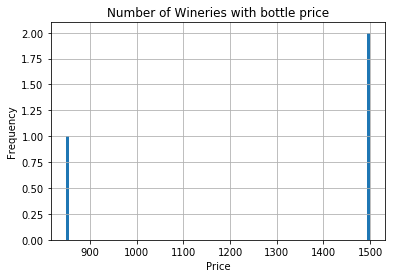

In [12]:
axes = top_3_largest_wineries.hist(column='price', bins=100)
plt.title('Number of Wineries with bottle price')
plt.xlabel('Price')
plt.ylabel('Frequency')

In [13]:
atleast_1000_reviews = wine_df.loc[:, 'country'].value_counts() > 1000
atleast_1000_reviews

US                         True
France                     True
Italy                      True
Spain                      True
Portugal                   True
Chile                      True
Argentina                  True
Austria                    True
Australia                  True
Germany                    True
New Zealand                True
South Africa               True
Israel                    False
Greece                    False
Canada                    False
Hungary                   False
Bulgaria                  False
Romania                   False
Uruguay                   False
Turkey                    False
Slovenia                  False
Georgia                   False
England                   False
Croatia                   False
Mexico                    False
Moldova                   False
Brazil                    False
Lebanon                   False
Morocco                   False
Peru                      False
Ukraine                   False
Serbia  

In [24]:
number_of_reveiws_per_country = pd.value_counts(wine_df['country'].values)
number_of_reveiws_per_country

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

Not able to solve how to return only the countries with the value count great than 1000...my intention is to return the countries which have more then a 1000 reviews and then create a scatter plot to represent just those countries, but I am not able to do so (was stuck on this for WAY too long and needed to move on)

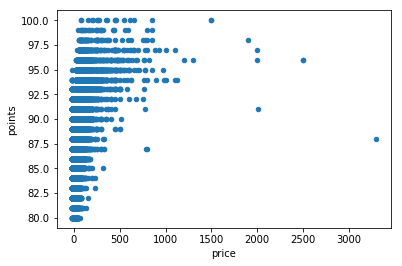

In [15]:
wine_df.plot(kind='scatter', x='price', y='points');

In [16]:
modified_wine = wine_df.dropna()

In [17]:
modified_wine.isnull().sum()

country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64

In [18]:
#Build a linear model predicting points from price

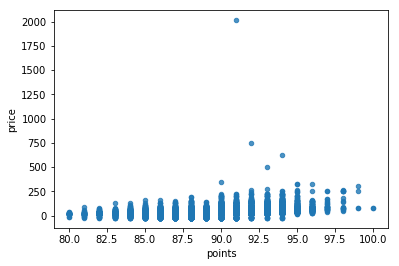

In [19]:
ax = modified_wine.plot(kind='scatter', x='points', y='price', alpha=.8)

In [28]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

feature_cols = ['points']
X = modified_wine.loc[:, feature_cols]
y = modified_wine.loc[:, 'price']

linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
y_pred = linreg.predict(X)
modified_wine.loc[:, 'y_pred'] = y_pred

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


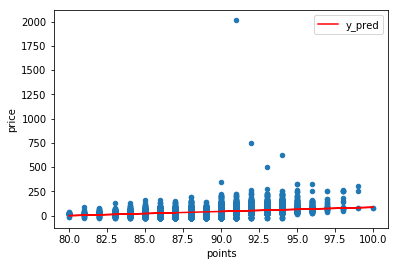

In [30]:
ax = modified_wine.plot(kind='scatter', x='points', y='price')
modified_wine.plot(x='points', y='y_pred', ax=ax, color='red');

As far as I got unfortunatly